In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel('Deans_Dilemma.xlsx')

Questions on descriptive analytics

1.  Plot box plot to find outliers in salary
2.  Plot bar chart and make inference on how gender affects placements
3.  Plot scatter plot between students MBA percentage (Percent_MBA) and salary and what inferences can you draw from the chart?






In [2]:
df.head()

,SlNo,Gender,Gender-B,Percent_SSC,Board_SSC,Board_CBSE,Board_ICSE,Percent_HSC,Board_HSC,Stream_HSC,...,Percentile_ET,Percent_MBA,S-TEST*SCORE,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Placement_B,Salary
0,1,M,0,62.00,Others,0,0,88.00,Others,Commerce,...,55.0,58.80,55.0,Marketing & HR,50,65,74,Placed,1,270000
1,2,M,0,76.33,ICSE,0,1,75.33,Others,Science,...,86.5,66.28,86.5,Marketing & Finance,69,70,75,Placed,1,200000
2,3,M,0,72.00,Others,0,0,78.00,Others,Commerce,...,0.0,52.91,0.0,Marketing & Finance,50,61,59,Placed,1,240000
3,4,M,0,60.00,CBSE,1,0,63.00,CBSE,Arts,...,75.0,57.80,75.0,Marketing & Finance,54,66,62,Placed,1,250000
4,5,M,0,61.00,CBSE,1,0,55.00,ISC,Science,...,66.0,59.43,66.0,Marketing & HR,52,65,67,Placed,1,180000


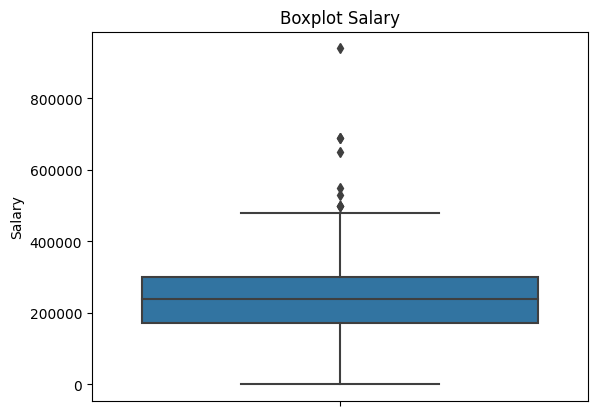

In [3]:
sns.boxplot(data=df,y=df['Salary'])
plt.title('Boxplot Salary')
plt.show()

In [4]:
df['Gender'].value_counts()

M    264
F    127
Name: Gender, dtype: int64

In [5]:
df_male=df[df['Gender']=='M']
df_female=df[df['Gender']=='F']

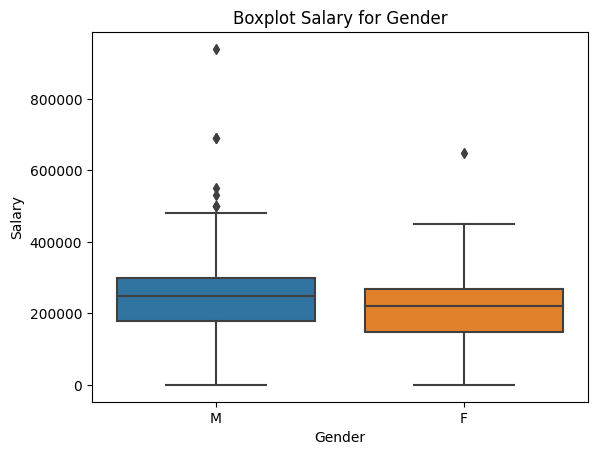

In [6]:
sns.boxplot(data=df, x="Gender", y="Salary")
plt.title('Boxplot Salary for Gender')
plt.show()

In [7]:
df2=df.copy()
df2['Salary'] = pd.cut(df2['Salary'], 7).cat.codes

In [8]:
pd.cut(df2['Salary'], 7).value_counts()

(0.857, 1.714]     169
(1.714, 2.571]     117
(-0.006, 0.857]     85
(2.571, 3.429]      15
(3.429, 4.286]       2
(4.286, 5.143]       2
(5.143, 6.0]         1
Name: Salary, dtype: int64

In [9]:
salary_by_gender = df2.groupby(['Gender', 'Salary']).size().unstack()

In [10]:
salary_by_gender

Salary,0,1,2,3,4,5,6
Gender,,,,,,,
F,31.0,64.0,30.0,1.0,1.0,NaN,NaN
M,54.0,105.0,87.0,14.0,1.0,2.0,1.0


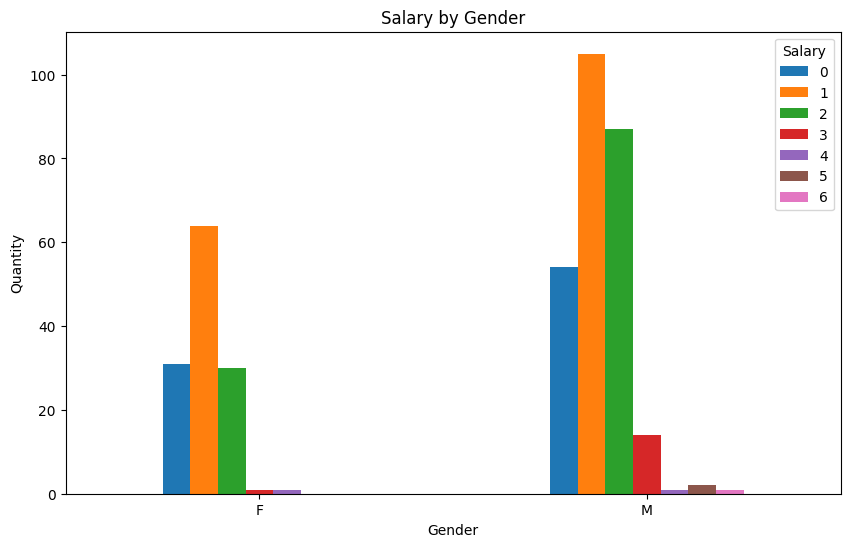

In [11]:
salary_by_gender.plot(kind='bar', figsize=(10, 6))
plt.title('Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Quantity')
plt.xticks(rotation=0)
plt.legend(title='Salary')
plt.show()

[]

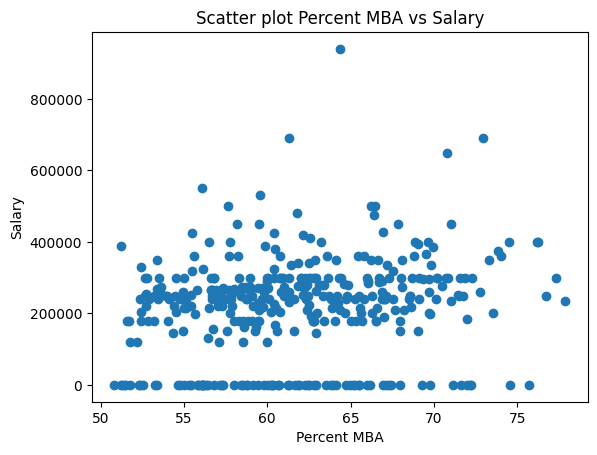

In [12]:
plt.scatter(df['Percent_MBA'],df['Salary'])
plt.title('Scatter plot Percent MBA vs Salary')
plt.xlabel('Percent MBA')
plt.ylabel('Salary')
plt.plot()
#We can say that the percentage obtained after compleition of MBA is not a significant variant for the salary. We can see that even those students with realtivly high percent don't have high salary

Questions on hypothesis testing
*  Pablo claims that males students average salary is more than females. Test
this claim with
appropriate hypothesis test
* Test the claim that average salary received by computer science, commerce and arts students is
different (variable Stream_HSC). Test this claim using appropriate hypothesis test

In [20]:
from scipy import stats
salary_male = df[df['Gender'] == 'M']['Salary']
salary_female = df[df['Gender'] == 'F']['Salary']

# Hypothesis testing
#H0: average(males salary)> average(females salary)
#H1: average(males salary)<= average(females salary)
#One tail test, t test
t_stat, p_value = stats.ttest_ind(salary_male, salary_female, alternative='greater',equal_var=False)
print(" t:", t_stat)
print(" p value (one tail):", p_value / 2)

alpha = 0.05  # significance value
if p_value / 2 < alpha and t_stat > 0:
    print("We reject H0")
else:
    print("We do not reject H0")

 t: 2.689957917015284
 p value (one tail): 0.0018943739659111809
We reject H0


In [22]:
df['Stream_HSC'].value_counts()

Commerce    222
Science     151
Arts         18
Name: Stream_HSC, dtype: int64

In [23]:
salary_science = df[df['Stream_HSC'] == 'Science']['Salary']
salary_commerce = df[df['Stream_HSC'] == 'Commerce']['Salary']
salary_arts=df[df['Stream_HSC'] == 'Arts']['Salary']

# Hypothesis testing
#H0: average(computer science salary)= average(commerce salary)= average(computer science arts)
#H1: The averages are different
#Anova test
f_statistic, p_value = stats.f_oneway(salary_science, salary_commerce, salary_arts)
print(" f:", f_statistic)
print(" p value:", p_value )

alpha = 0.05  # significance value
if p_value < alpha:
    print("Reject H0")
else:
    print("Do not reject H0. We don't have enough evidence to say that the differences are significant")

 f: 0.9378565284715169
 p value: 0.39235161561416954
Do not reject H0


Pablo wants to make a decision of admitting a student in his university based on their predicted salary
that they can get at the end of the course. Create multiple regression model which Pablo can use at
the time of admission of student to predict their salary. Find the significant variables in the prediction
model which Pablo should consider in making a decision and how these variables affect the final
predicted salary of a student.
Create model by following all steps of model development (data cleaning, missing value analysis,
outlier handling and correlation analysis). Present your model output in the form of a equation with
salary and outcome variable. Document clearly all your steps and inferences.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 391 non-null    int64  
 1   Gender               391 non-null    object 
 2   Gender-B             391 non-null    int64  
 3   Percent_SSC          391 non-null    float64
 4   Board_SSC            391 non-null    object 
 5   Board_CBSE           391 non-null    int64  
 6   Board_ICSE           391 non-null    int64  
 7   Percent_HSC          391 non-null    float64
 8   Board_HSC            391 non-null    object 
 9   Stream_HSC           391 non-null    object 
 10  Percent_Degree       391 non-null    float64
 11  Course_Degree        391 non-null    object 
 12  Degree_Engg          391 non-null    int64  
 13  Experience_Yrs       391 non-null    int64  
 14  Entrance_Test        324 non-null    object 
 15  S-TEST               391 non-null    int

<Axes: >

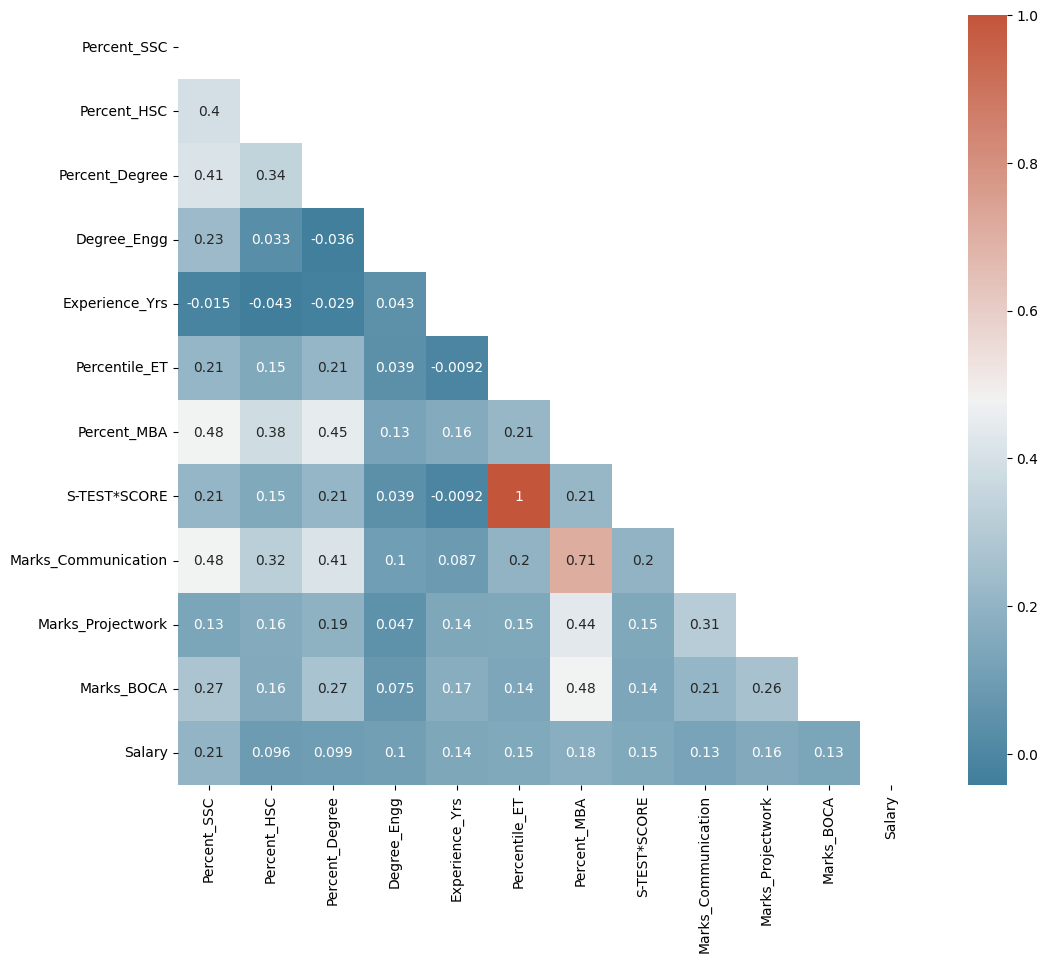

In [33]:
df_numeric= df.drop(['SlNo','Gender','Gender-B','Board_SSC','Board_CBSE','Board_ICSE','Board_HSC','Stream_HSC','Course_Degree','Entrance_Test','Specialization_MBA','Placement','Placement_B','S-TEST'], axis=1)
corr = df_numeric.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)


In [ ]:
# We remove S_TEST*SCORE because is the same as Perentile_ET.
#For the category variables, we evaluate with boxplots if there is a difference between the categories. We saw in these graphs that there is a difference.
#So we select those variables transformed

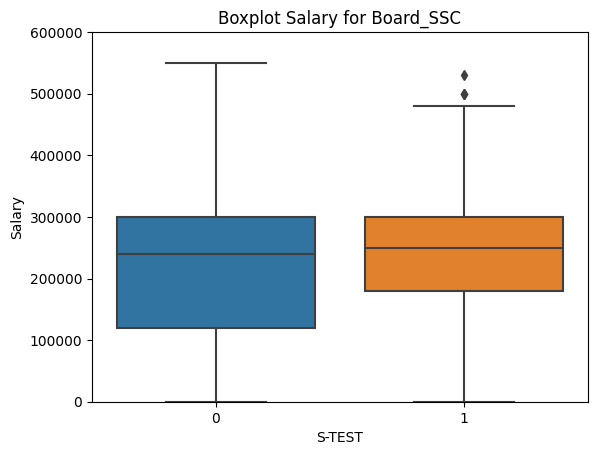

In [51]:
sns.boxplot(data=df, x="S-TEST", y="Salary")
plt.title('Boxplot Salary for Categorical variable X')
plt.ylim(0,600000)
plt.show()
#'SlNo','Gender','Gender-B','Board_SSC','Board_CBSE','Board_ICSE','Board_HSC','Stream_HSC','Course_Degree','Entrance_Test','Specialization_MBA','Placement','Placement_B','S-TEST'

In [58]:
df.iloc[:,10:26]

,Percent_Degree,Course_Degree,Degree_Engg,Experience_Yrs,Entrance_Test,S-TEST,Percentile_ET,Percent_MBA,S-TEST*SCORE,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Placement_B,Salary
0,52.00,Science,0,0,MAT,1,55.00,58.80,55.00,Marketing & HR,50,65,74,Placed,1,270000
1,75.48,Computer Applications,0,1,MAT,1,86.50,66.28,86.50,Marketing & Finance,69,70,75,Placed,1,200000
2,66.63,Engineering,1,0,NaN,0,0.00,52.91,0.00,Marketing & Finance,50,61,59,Placed,1,240000
3,58.00,Management,0,0,MAT,1,75.00,57.80,75.00,Marketing & Finance,54,66,62,Placed,1,250000
4,54.00,Engineering,1,1,MAT,1,66.00,59.43,66.00,Marketing & HR,52,65,67,Placed,1,180000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,52.00,Management,0,0,MAT,1,34.53,58.63,34.53,Marketing & HR,62,57,56,Placed,1,162000
387,64.00,Management,0,0,MAT,1,50.53,59.50,50.53,Marketing & Finance,70,59,56,Placed,1,450000
388,57.00,Management,0,0,MAT,1,60.00,61.63,60.00,Marketing & IB,73,73,54,Placed,1,240000
389,53.00,Commerce,0,0,MAT,1,77.00,70.17,77.00,Marketing & Finance,67,77,57,Placed,1,300000


In [59]:
df['Course_Degree'].value_counts()

Management               163
Commerce                 117
Engineering               37
Computer Applications     32
Science                   24
Arts                      13
Others                     5
Name: Course_Degree, dtype: int64

In [77]:
df_mod=df.copy()
df_mod['Stream_HSC'] = df_mod['Stream_HSC'].map({'Science': 0, 'Commerce': 1,'Arts':2})
df_mod['Specialization_MBA'] = df_mod['Specialization_MBA'].map({'Marketing & Finance': 0, 'Marketing & HR': 1,'Marketing & IB':2})
df_mod['Course_Degree'] = df_mod['Course_Degree'].map({'Management': 0, 'Commerce': 1,'Engineering':2,'Computer Applications':3,'Science':4,'Arts':5,'Others':6})
df_mod['Entrance_Test'] = df_mod['Entrance_Test'].map({'MAT': 0, 'K-MAT': 1,'CAT':2,'PGCET':3,'GCET':4,'G-MAT':5,'XAT':6,'G-SAT':7})
df_mod=df_mod.drop(['SlNo','Gender','Placement','Board_SSC','Board_HSC','S-TEST*SCORE'], axis=1)
df_mod=df_mod.dropna()

In [78]:
X=df_mod.drop('Salary', axis=1)
y=df_mod['Salary']

In [79]:
import statsmodels.api as sm

X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())
#we can see that the most import variables are: Gender, Degree_Engg, Experience_Yrs, Entrance_Test, S-TEST, Specialization_MBA

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     36.18
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           9.06e-65
Time:                        22:01:24   Log-Likelihood:                -4110.7
No. Observations:                 324   AIC:                             8259.
Df Residuals:                     305   BIC:                             8331.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Gender-B            -3.341e+04   1